# Setup and Library Imports

## Install Dependencies

In [ ]:
!pip install catboost --quiet

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix
)
from sklearn.calibration import CalibratedClassifierCV

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

import shap

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="Set2")

## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dementia Prediction Dataset.csv')

/tmp/ipython-input-4090008852.py:1: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dementia Prediction Dataset.csv')


In [ ]:
df.head()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,NACCCORE,NACCREAS,NACCREFR,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,HISPORX,RACE,RACEX,RACESEC,RACESECX,RACETER,RACETERX,PRIMLANG,PRIMLANX,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,INHISPOX,NACCNINR,INRACE,INRACEX,INRASEC,INRASECX,INRATER,INRATERX,INEDUC,INRELTO,INRELTOX,INKNOWN,INLIVWTH,INVISITS,INCALLS,INRELY,NACCFAM,NACCMOM,NACCDAD,NACCAM,NACCAMX,NACCAMS,NACCAMSX,NACCFM,NACCFMX,NACCFMS,NACCFMSX,NACCOM,NACCOMX,NACCOMS,NACCOMSX,NACCFADM,NACCFFTD,ANYMEDS,DRUG1,DRUG2,DRUG3,DRUG4,DRUG5,DRUG6,DRUG7,DRUG8,DRUG9,DRUG10,DRUG11,DRUG12,DRUG13,DRUG14,DRUG15,DRUG16,DRUG17,DRUG18,DRUG19,DRUG20,DRUG21,DRUG22,DRUG23,DRUG24,DRUG25,DRUG26,DRUG27,DRUG28,DRUG29,DRUG30,DRUG31,DRUG32,DRUG33,DRUG34,DRUG35,DRUG36,DRUG37,DRUG38,DRUG39,DRUG40,TOBAC30,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOCCAS,ALCFREQ,CVHATT,HATTMULT,HATTYEAR,CVAFIB,CVANGIO,CVBYPASS,CVPACDEF,CVPACE,CVCHF,CVANGINA,CVHVALVE,CVOTHR,CVOTHRX,CBSTROKE,STROKMUL,NACCSTYR,CBTIA,TIAMULT,NACCTIYR,PD,PDYR,PDOTHR,PDOTHRYR,SEIZURES,NACCTBI,TBI,TBIBRIEF,TRAUMBRF,TBIEXTEN,TRAUMEXT,TBIWOLOS,TRAUMCHR,TBIYEAR,NCOTHR,NCOTHRX,DIABETES,DIABTYPE,HYPERTEN,HYPERCHO,B12DEF,THYROID,ARTHRIT,ARTHTYPE,ARTHTYPX,ARTHUPEX,ARTHLOEX,ARTHSPIN,ARTHUNK,INCONTU,INCONTF,APNEA,RBD,INSOMN,OTHSLEEP,OTHSLEEX,ALCOHOL,ABUSOTHR,ABUSX,PTSD,BIPOLAR,SCHIZ,DEP2YRS,DEPOTHR,ANXIETY,OCD,NPSYDEV,PSYCDIS,PSYCDISX,HEIGHT,WEIGHT,BPSYS,BPDIAS,HRATE,VISION,VISCORR,VISWCORR,HEARING,HEARAID,HEARWAID,ABRUPT,STEPWISE,SOMATIC,EMOT,HXHYPER,HXSTROKE,FOCLSYM,FOCLSIGN,HACHIN,CVDCOG,STROKCOG,CVDIMAG,CVDIMAG1,CVDIMAG2,CVDIMAG3,CVDIMAG4,CVDIMAGX,PDNORMAL,SPEECH,SPEECHX,FACEXP,FACEXPX,TRESTFAC,TRESTFAX,TRESTRHD,TRESTRHX,TRESTLHD,TRESTLHX,TRESTRFT,TRESTRFX,TRESTLFT,TRESTLFX,TRACTRHD,TRACTRHX,TRACTLHD,TRACTLHX,RIGDNECK,RIGDNEX,RIGDUPRT,RIGDUPRX,RIGDUPLF,RIGDUPLX,RIGDLORT,RIGDLORX,RIGDLOLF,RIGDLOLX,TAPSRT,TAPSRTX,TAPSLF,TAPSLFX,HANDMOVR,HANDMVRX,HANDMOVL,HANDMVLX,HANDALTR,HANDATRX,HANDALTL,HANDATLX,LEGRT,LEGRTX,LEGLF,LEGLFX,ARISING,ARISINGX,POSTURE,POSTUREX,GAIT,GAITX,POSSTAB,POSSTABX,BRADYKIN,BRADYKIX,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRSUM,CDRGLOB,COMPORT,CDRLANG,NPIQINF,NPIQINFX,DEL,DELSEV,HALL,HALLSEV,AGIT,AGITSEV,DEPD,DEPDSEV,ANX,ANXSEV,ELAT,ELATSEV,APA,APASEV,DISN,DISNSEV,IRR,IRRSEV,MOT,MOTSEV,NITE,NITESEV,APP,APPSEV,NOGDS,SATIS,DROPACT,EMPTY,BORED,SPIRITS,AFRAID,HAPPY,HELPLESS,STAYHOME,MEMPROB,WONDRFUL,WRTHLESS,ENERGY,HOPELESS,BETTER,NACCGDS,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,NACCNREX,NORMEXAM,FOCLDEF,GAITDIS,EYEMOVE,PARKSIGN,RESTTRL,RESTTRR,SLOWINGL,SLOWINGR,RIGIDL,RIGIDR,BRADY,PARKGAIT,POSTINST,CVDSIGNS,CORTDEF,SIVDFIND,CVDMOTL,CVDMOTR,CORTVISL,CORTVISR,SOMATL,SOMATR,POSTCORT,PSPCBS,EYEPSP,DYSPSP,AXIALPSP,GAITPSP,APRAXSP,APRAXL,APRAXR,CORTSENL,CORTSENR,ATAXL,ATAXR,ALIENLML,ALIENLMR,DYSTONL,DYSTONR,MYOCLLT,MYOCLRT,ALSFIND,GAITNPH,OTHNEUR,OTHNEURX,B9CHG,DECSUB,DECIN,DECCLIN,DECCLCOG,COGMEM,COGORI,COGJUDG,COGLANG,COGVIS,COGATTN,COGFLUC,COGFLAGO,COGOTHR,COGOTHRX,NACCCOGF,NACCCGFX,COGMODE,COGMODEX,DECAGE,DECCLBE,BEAPATHY,BEDEP,BEVHALL,BEVWELL,BEVHAGO,BEAHALL,BEDEL,BEDISIN,BEIRRIT,BEAGIT,BEPERCH,BEREM,BEREMAGO,BEANX,BEOTHR,BEOTHRX,NACCBEHF,NACCBEFX,BEMODE,BEMODEX,BEAGE,DECCLMOT,MOGAIT,MOFALLS,MOTREM,MOSLOW,NACCMOTF,MOMODE,MOMODEX,MOMOPARK,PARKAGE,MOMOALS,ALSAGE,MOAGE,COURSE,FRSTCHG,LBDEVAL,FTLDEVAL,MMSECOMP,MMSELOC,MMSELAN,MMSELANX,MMSEVIS,MMSEHEAR,MMSEORDA,MMSEORLO,PENTAGON,NACCMMSE,NPSYCLOC,NPSYLAN,NPSYLANX,LOGIMO,LOGIDAY,LOGIYR,LOGIPREV,LOGIMEM,MEMUNITS,MEMTIME,UDSBENTC,UDSBENTD,UDSBENRS,DIGIF,DIGIFLEN,DIGIB,DIGIBLEN,ANIMALS,VEG,TRAILA,TRAILARR,TRAILALI,TRAILB,TRAILBRR,TRAILBLI,WAIS,BOSTON,UDSVERFC,UDSVERFN,UDSVERNF,UDSVERLC,UDSVERLR,UDSVERLN,UDSVERTN,UDSVERTE,UDSVERTI,COGSTAT,NACCC1,MOCACOMP,MOCAREAS,MOCALOC,MOCALAN,MOCALANX,MOCAVIS,MOCAHEAR,MOCATOTS,MOCATRAI,MOCACUBE,MOCACLOC,MOCACLON,MOCACLOH,MOCANAMI,MOCAREGI,MOCADIGI,MOCALETT,MOCASER7,MOCAREPE,MOCAFL

# Data Understanding and Exploratory Analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195196 entries, 0 to 195195
Columns: 1024 entries, NACCID to NPATGFR4
dtypes: float64(135), int64(747), object(142)
memory usage: 1.5+ GB


In [ ]:
df.shape

(195196, 1024)

In [ ]:
summary = []

for col in df.columns:
    col_data = df[col]

    summary.append({
        "Column Name": col,
        "Data Type": col_data.dtype,
        "Unique Values": col_data.nunique(),
        "Non-missing count": col_data.notna().sum(),
        "Number of Missing Values": col_data.isna().sum(),
        "% Missing": col_data.isna().mean() * 100,
        "% Unique": (col_data.nunique() / len(df)) * 100
    })

pd.DataFrame(summary)

,Column Name,Data Type,Unique Values,Non-missing count,Number of Missing Values,% Missing,% Unique
0,NACCID,object,52537,195196,0,0.0,26.914998
1,NACCADC,int64,46,195196,0,0.0,0.023566
2,PACKET,object,4,195196,0,0.0,0.002049
3,FORMVER,float64,4,195196,0,0.0,0.002049
4,VISITMO,int64,12,195196,0,0.0,0.006148
...,...,...,...,...,...,...,...
1019,NPATGFRN,int64,5,195196,0,0.0,0.002562
1020,NPATGFR1,int64,6,195196,0,0.0,0.003074
1021,NPATGFR2,int64,6,195196,0,0.0,0.003074
1022,NPATGFR3,int64,6,195196,0,0.0,0.003074


In [ ]:
display(df.isna().sum())

,0
NACCID,0
NACCADC,0
PACKET,0
FORMVER,0
VISITMO,0
...,...
NPATGFRN,0
NPATGFR1,0
NPATGFR2,0
NPATGFR3,0


# Feature Engineering and Feature Selection

## Selected Non-Medical Predictors

In [ ]:
selected_columns = [
    'NACCID',           # Group key: aggregate visits per person
    'VISITYR',          # Derive age; user knows current year
    'BIRTHMO',          # Precise age if needed
    'BIRTHYR',          # Derive age; user knows birth year
    'SEX',              # Self-known demographic (major risk: female > male)
    'EDUC',             # Years of education (strongest non-med predictor)
    'MARISTAT',         # Marital status (widowed = isolation risk)
    'NACCLIVS',         # Living situation (alone = high risk)
    'INDEPEND',         # Can live independently? (self-assessed function)
    'NACCFAM',          # Any family dementia? (self-known risk)
    'NACCMOM',          # Mother had dementia? (strongest familial)
    'NACCDAD',          # Father had dementia?
    'TOBAC30',          # Smoked last 30 days? (current habit)
    'TOBAC100',         # Ever smoked 100+? (lifetime exposure)
    'ALCOCCAS',         # Drank alcohol last 3 months?
    'ALCFREQ',          # Drinking frequency (heavy = risk)
    'CBSTROKE',         # Ever had stroke? (self-known, major risk)
    'HATTYEAR',         # Year of heart attack (if yes to CVHATT)
    'CVHATT',           # Heart attack? (vascular dementia link)
    'DIABETES',         # Diabetes? (vascular + direct risk)
    'HYPERTEN',         # Hypertension? (vascular risk)
    'DEP2YRS',          # Depression last 2 years? (reversible risk)
    'ANXIETY',          # Anxiety disorder? (comorbid risk)
    'HEARING',          # Hearing impairment? (self-known, social isolation link)
    'DEMENTED'          # Target: 1 = at risk, 0 = not
]

In [ ]:
df = df[selected_columns]

In [ ]:
display(df.describe(include='all'))

,NACCID,VISITYR,BIRTHMO,BIRTHYR,SEX,EDUC,MARISTAT,NACCLIVS,INDEPEND,NACCFAM,NACCMOM,NACCDAD,TOBAC30,TOBAC100,ALCOCCAS,ALCFREQ,CBSTROKE,HATTYEAR,CVHATT,DIABETES,HYPERTEN,DEP2YRS,ANXIETY,HEARING,DEMENTED
count,195196,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000
unique,52537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NACC874179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2014.374101,6.534693,1939.533054,1.580996,15.975163,1.777741,2.005036,1.535718,1.243694,0.510241,0.422596,-1.421653,-1.128102,-3.519714,-3.170628,-1.383205,864.943170,-1.377923,-1.354249,-1.070990,-1.227407,-3.559940,0.237551,0.295037
std,NaN,5.331593,3.454612,11.795708,0.493397,6.700796,1.290757,0.901166,0.966394,2.387189,1.407992,1.654990,2.020643,2.325263,1.482048,2.671313,2.067604,2633.180377,2.068612,2.079649,2.311365,2.242460,1.357612,1.968243,0.456060
min,NaN,2005.000000,1.000000,1896.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000
25%,NaN,2010.000000,3.000000,1931.000000,1.000000,13.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000
50%,NaN,2014.000000,7.000000,1939.000000,2.000000,16.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,-4.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,1.000000,0.000000
75%,NaN,2019.000000,10.000000,1947.000000,2.000000,18.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-4.000000,-4.000000,0.000000,-4.000000,0.000000,0.000000,1.000000,0.000000,-4.000000,1.000000,1.000000


In [ ]:
display(df.describe(include="object"))

,NACCID
count,195196
unique,52537
top,NACC874179
freq,20


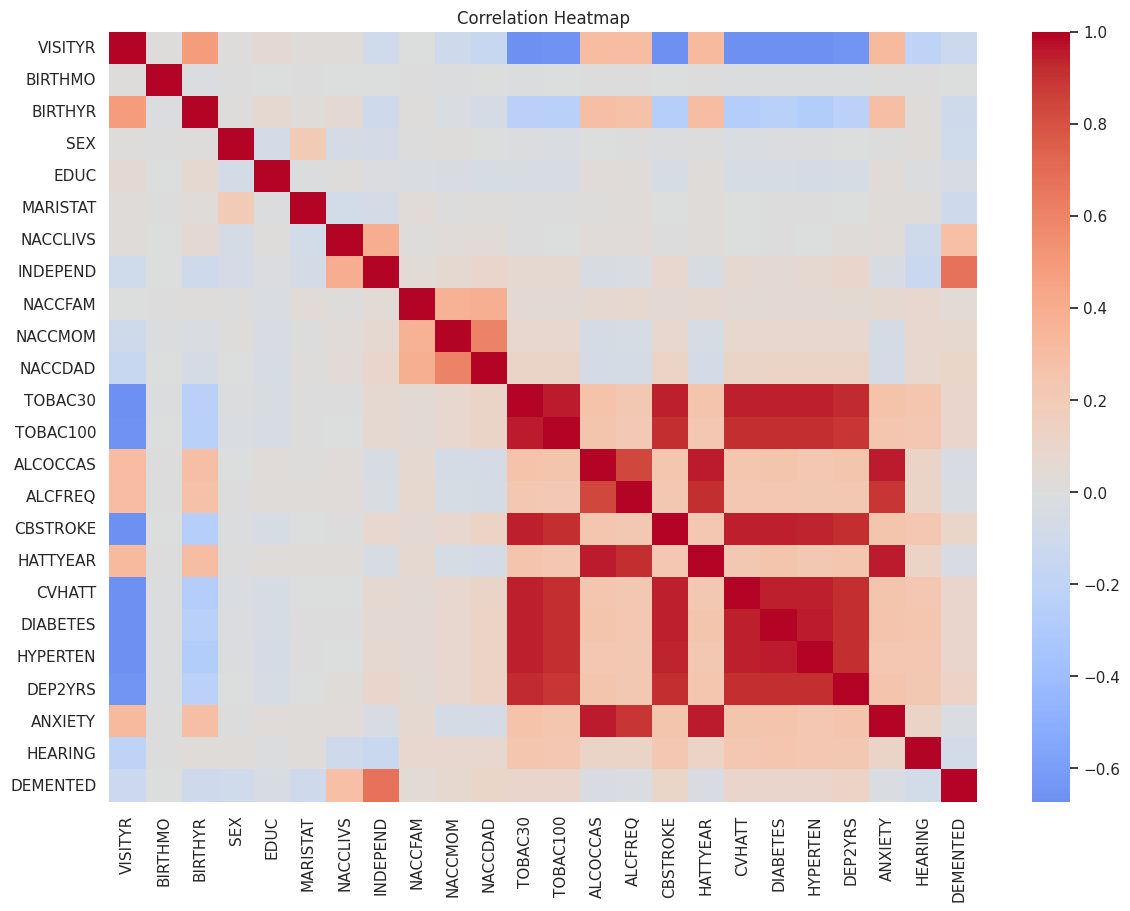

In [ ]:
plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
high_corr = corr[(corr.abs() > 0.8) & (corr.abs() < 1.0)]

display(high_corr.dropna(how='all').dropna(axis=1, how='all'))

,TOBAC30,TOBAC100,ALCOCCAS,ALCFREQ,CBSTROKE,HATTYEAR,CVHATT,DIABETES,HYPERTEN,DEP2YRS,ANXIETY
TOBAC30,NaN,0.951946,NaN,NaN,0.944106,NaN,0.945157,0.947485,0.942867,0.923492,NaN
TOBAC100,0.951946,NaN,NaN,NaN,0.913566,NaN,0.916140,0.917314,0.914221,0.893893,NaN
ALCOCCAS,NaN,NaN,NaN,0.837921,NaN,0.951349,NaN,NaN,NaN,NaN,0.955276
ALCFREQ,NaN,NaN,0.837921,NaN,NaN,0.917080,NaN,NaN,NaN,NaN,0.891643
CBSTROKE,0.944106,0.913566,NaN,NaN,NaN,NaN,0.942841,0.943685,0.940282,0.917518,NaN
HATTYEAR,NaN,NaN,0.951349,0.917080,NaN,NaN,NaN,NaN,NaN,NaN,0.949410
CVHATT,0.945157,0.916140,NaN,NaN,0.942841,NaN,NaN,0.945617,0.942845,0.916572,NaN
DIABETES,0.947485,0.917314,NaN,NaN,0.943685,NaN,0.945617,NaN,0.948627,0.919638,NaN
HYPERTEN,0.942867,0.914221,NaN,NaN,0.940282,NaN,0.942845,0.948627,NaN,0.915748,NaN
DEP2YRS,0.923492,0.893893,NaN,NaN,0.917518,NaN,0.916572,0.919638,0.915748,NaN,NaN


In [ ]:
df.columns

Index(['NACCID', 'VISITYR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'EDUC', 'MARISTAT',
       'NACCLIVS', 'INDEPEND', 'NACCFAM', 'NACCMOM', 'NACCDAD', 'TOBAC30',
       'TOBAC100', 'ALCOCCAS', 'ALCFREQ', 'CBSTROKE', 'HATTYEAR', 'CVHATT',
       'DIABETES', 'HYPERTEN', 'DEP2YRS', 'ANXIETY', 'HEARING', 'DEMENTED'],
      dtype='object')

In [ ]:
df["SEX"].unique()

array([1, 2])

In [ ]:
{col: df[col].unique() for col in df.columns}

{'NACCID': array(['NACC002909', 'NACC003487', 'NACC004352', ..., 'NACC998475',
        'NACC999391', 'NACC999420'], dtype=object),
 'VISITYR': array([2022, 2024, 2023, 2021, 2019, 2020, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017, 2018, 2006, 2008, 2007, 2005]),
 'BIRTHMO': array([ 5, 12,  1,  2,  7,  8, 10, 11,  3,  6,  9,  4]),
 'BIRTHYR': array([1952, 1956, 1958, 1945, 1942, 1936, 1949, 1957, 1951, 1950, 1947,
        1948, 1963, 1959, 1938, 1953, 1941, 1940, 1971, 1930, 1954, 1939,
        1946, 1944, 1973, 1960, 1962, 1965, 1943, 1964, 1934, 1937, 1935,
        1928, 2000, 1955, 1975, 1969, 1961, 1974, 1933, 1976, 1978, 1967,
        1984, 1972, 1966, 1981, 1970, 1929, 1990, 1968, 1931, 1992, 1979,
        1932, 1993, 1926, 1980, 1920, 1985, 1921, 1986, 1927, 1925, 2002,
        1977, 1991, 1919, 1989, 1983, 1913, 1924, 1982, 1923, 1987, 1918,
        1917, 1922, 1995, 1994, 1914, 2003, 1999, 1988, 1915, 1916, 1912,
        1910, 1911, 1907, 1996, 1909, 1998, 1997

## Cleaning and Handling Special Codes

In [ ]:
df_base = df.sort_values(['NACCID', 'VISITYR']).drop_duplicates('NACCID', keep='first')
print(df_base.shape)
df_base.head()

(52537, 25)


,NACCID,VISITYR,BIRTHMO,BIRTHYR,SEX,EDUC,MARISTAT,NACCLIVS,INDEPEND,NACCFAM,NACCMOM,NACCDAD,TOBAC30,TOBAC100,ALCOCCAS,ALCFREQ,CBSTROKE,HATTYEAR,CVHATT,DIABETES,HYPERTEN,DEP2YRS,ANXIETY,HEARING,DEMENTED
33207,NACC000011,2006,2,1944,2,16,1,2,1,9,9,9,0,0,-4,-4,0,-4,0,0,0,0,-4,1,0
189554,NACC000034,2015,8,1935,2,15,2,1,1,1,1,1,0,0,1,0,0,8888,0,0,1,0,0,1,0
36116,NACC000067,2012,4,1952,1,18,1,2,2,1,1,0,0,0,-4,-4,0,-4,0,0,0,1,-4,0,0
100765,NACC000073,2016,9,1971,2,18,1,2,1,0,0,0,0,0,1,2,0,8888,0,0,0,0,9,1,0
54831,NACC000095,2014,11,1926,1,16,1,2,2,1,0,0,0,0,-4,-4,0,-4,0,0,1,1,-4,1,1


In [ ]:
special_codes = [-4, 8, 9, 88, 99, 8888, 9999]
cols_to_clean = [c for c in df_base.columns if c not in ['NACCID', 'VISITYR', 'BIRTHMO', 'BIRTHYR', 'DEMENTED']]

df_base[cols_to_clean] = df_base[cols_to_clean].replace(special_codes, np.nan)

df_base[cols_to_clean].isna().sum()

,0
SEX,0
EDUC,1423
MARISTAT,429
NACCLIVS,206
INDEPEND,351
NACCFAM,6572
NACCMOM,2106
NACCDAD,2855
TOBAC30,367
TOBAC100,874


In [ ]:
# NaN mapping
nan_map = {
    'EDUC': [99],
    'MARISTAT': [9],
    'NACCLIVS': [9],
    'INDEPEND': [9],
    'NACCFAM': [9],
    'NACCMOM': [9],
    'NACCDAD': [9],
    'TOBAC30': [9],
    'TOBAC100': [9],
    'ALCOCCAS': [9],
    'ALCFREQ': [8,9],
    'CBSTROKE': [9],
    'HATTYEAR': [9999],
    'CVHATT': [9],
    'DIABETES': [9],
    'HYPERTEN': [9],
    'DEP2YRS': [9],
    'ANXIETY': [9],
    'HEARING': [9]
}

# 0 mapping for Not Applicable
zero_map = {
    'NACCFAM': [-4],
    'NACCMOM': [-4],
    'NACCDAD': [-4],
    'TOBAC30': [-4],
    'TOBAC100': [-4],
    'ALCOCCAS': [-4],
    'ALCFREQ': [-4],
    'CBSTROKE': [-4],
    'HATTYEAR': [8888],
    'CVHATT': [-4],
    'DIABETES': [-4],
    'HYPERTEN': [-4],
    'DEP2YRS': [-4],
    'ANXIETY': [-4],
    'HEARING': [-4]
}

# Apply
for col, vals in nan_map.items():
    df_base[col] = df_base[col].replace(vals, np.nan)
for col, vals in zero_map.items():
    df_base[col] = df_base[col].replace(vals, 0)

In [ ]:
df_base.isna().sum()

,0
NACCID,0
VISITYR,0
BIRTHMO,0
BIRTHYR,0
SEX,0
EDUC,1423
MARISTAT,429
NACCLIVS,206
INDEPEND,351
NACCFAM,6572


## Feature Creation and Risk Aggregation

In [ ]:
df_base['AGE'] = (df_base['VISITYR'] - df_base['BIRTHYR']).clip(lower=50, upper=100)
df_base['AGE'].describe()

,AGE
count,52537.000000
mean,71.756096
std,9.819797
min,50.000000
25%,65.000000
50%,72.000000
75%,79.000000
max,100.000000


In [ ]:
df_base['SEX'] = df_base['SEX'].map({1:1, 2:0})

In [ ]:
for col in ['TOBAC30','TOBAC100']:
    df_base[col] = df_base[col].fillna(0).astype(int)

In [ ]:
df_base['HEARING'] = df_base['HEARING'].fillna(0).astype(int)

In [ ]:
vasc_cols = ['CVHATT','CBSTROKE','DIABETES','HYPERTEN']
mental_cols = ['DEP2YRS','ANXIETY']

for col in vasc_cols + mental_cols:
    df_base[col] = df_base[col].map({1:1, 2:1}).fillna(0).astype(int)

In [ ]:
df_base[['NACCFAM','NACCMOM','NACCDAD']] = df_base[['NACCFAM','NACCMOM','NACCDAD']].fillna(0)
df_base['FAM_RISK'] = (df_base['NACCFAM'] + 1.5*df_base['NACCMOM'] + df_base['NACCDAD']) / 3.5

In [ ]:
df_base.describe()

,VISITYR,BIRTHMO,BIRTHYR,SEX,EDUC,MARISTAT,NACCLIVS,INDEPEND,NACCFAM,NACCMOM,NACCDAD,TOBAC30,TOBAC100,ALCOCCAS,ALCFREQ,CBSTROKE,HATTYEAR,CVHATT,DIABETES,HYPERTEN,DEP2YRS,ANXIETY,HEARING,DEMENTED,AGE,FAM_RISK
count,52537.000000,52537.000000,52537.000000,52537.000000,51114.000000,52108.000000,52331.000000,52186.000000,52537.000000,52537.000000,52537.00000,52537.000000,52537.000000,19326.000000,12241.000000,52537.000000,603.000000,52537.000000,52537.000000,52537.000000,52537.000000,52537.000000,52537.000000,52537.000000,52537.000000,52537.000000
mean,2012.695358,6.543979,1941.152807,0.426975,15.377979,1.741422,1.995261,1.472617,0.513333,0.325409,0.16181,0.047167,0.415079,0.637069,2.273916,0.043093,2007.825871,0.049946,0.137103,0.496336,0.286408,0.089232,0.758342,0.324533,71.756096,0.332359
std,5.952705,3.440776,12.945931,0.494643,3.291436,1.229104,0.805708,0.789159,0.499827,0.468532,0.36828,0.211997,0.492740,0.480858,1.380198,0.203069,10.167265,0.217835,0.343960,0.499991,0.452087,0.285082,0.428092,0.468205,9.819797,0.351446
min,2005.000000,1.000000,1896.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000
25%,2007.000000,4.000000,1932.000000,0.000000,13.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,65.000000,0.000000
50%,2012.000000,7.000000,1941.000000,0.000000,16.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2.000000,0.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,72.000000,0.285714
75%,2018.000000,10.000000,1950.000000,1.000000,18.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,3.000000,0.000000,2015.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,79.000000,0.714286
max,2024.000000,12.000000,2005.000000,1.000000,31.000000,6.000000,5.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,4.000000,1.000000,2024.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000


In [ ]:
df_base['ALCOCCAS'] = df_base['ALCOCCAS'].fillna(0).astype(int)

In [ ]:
df_base['ALCFREQ'] = df_base['ALCFREQ'].replace({-4:0, 8:0, 9:0}).fillna(0)
df_base['ALC_RISK'] = df_base['ALCFREQ'] / 4  # scales 0–1

In [ ]:
df_base[['ALCOCCAS', 'ALC_RISK']].describe()

,ALCOCCAS,ALC_RISK
count,52537.000000,52537.000000
mean,0.234349,0.132454
std,0.423595,0.292392
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [ ]:
health_cols = ['TOBAC30','TOBAC100','CBSTROKE','CVHATT','DIABETES','HYPERTEN','DEP2YRS','ANXIETY','HEARING']

df_base[health_cols] = df_base[health_cols].replace({-4:0, 9:0, 8888:0, 2:1}).fillna(0).astype(int)

In [ ]:
df_base[health_cols].describe()

,TOBAC30,TOBAC100,CBSTROKE,CVHATT,DIABETES,HYPERTEN,DEP2YRS,ANXIETY,HEARING
count,52537.000000,52537.000000,52537.000000,52537.000000,52537.000000,52537.000000,52537.000000,52537.000000,52537.000000
mean,0.047167,0.415079,0.043093,0.049946,0.137103,0.496336,0.286408,0.089232,0.758342
std,0.211997,0.492740,0.203069,0.217835,0.343960,0.499991,0.452087,0.285082,0.428092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_base['FAM_RISK'] = df_base[['NACCFAM','NACCMOM','NACCDAD']].max(axis=1)

In [ ]:
df_base["FAM_RISK"].value_counts()

,count
FAM_RISK,
1.0,26969
0.0,25568


In [ ]:
nan_counts = df_base.isna().sum().sort_values(ascending=False)
print("=== NaN Counts by Column ===")
print(nan_counts)

=== NaN Counts by Column ===
HATTYEAR    51934
EDUC         1423
MARISTAT      429
INDEPEND      351
NACCLIVS      206
BIRTHYR         0
VISITYR         0
BIRTHMO         0
SEX             0
NACCFAM         0
NACCMOM         0
NACCID          0
NACCDAD         0
TOBAC30         0
ALCOCCAS        0
TOBAC100        0
ALCFREQ         0
CBSTROKE        0
CVHATT          0
DIABETES        0
HYPERTEN        0
DEP2YRS         0
ANXIETY         0
HEARING         0
DEMENTED        0
AGE             0
FAM_RISK        0
ALC_RISK        0
dtype: int64


In [ ]:
numeric_cols = df_base.select_dtypes(include=['int64', 'float64']).columns

numeric_summary = df_base[numeric_cols].agg(['min', 'max', 'mean']).T
print("=== Numeric Columns: Min, Max, Mean ===")
print(numeric_summary.sort_index())

=== Numeric Columns: Min, Max, Mean ===
             min     max         mean
AGE         50.0   100.0    71.756096
ALCFREQ      0.0     4.0     0.529817
ALCOCCAS     0.0     1.0     0.234349
ALC_RISK     0.0     1.0     0.132454
ANXIETY      0.0     1.0     0.089232
BIRTHMO      1.0    12.0     6.543979
BIRTHYR   1896.0  2005.0  1941.152807
CBSTROKE     0.0     1.0     0.043093
CVHATT       0.0     1.0     0.049946
DEMENTED     0.0     1.0     0.324533
DEP2YRS      0.0     1.0     0.286408
DIABETES     0.0     1.0     0.137103
EDUC         0.0    31.0    15.377979
FAM_RISK     0.0     1.0     0.513333
HATTYEAR  1958.0  2024.0  2007.825871
HEARING      0.0     1.0     0.758342
HYPERTEN     0.0     1.0     0.496336
INDEPEND     1.0     4.0     1.472617
MARISTAT     1.0     6.0     1.741422
NACCDAD      0.0     1.0     0.161810
NACCFAM      0.0     1.0     0.513333
NACCLIVS     1.0     5.0     1.995261
NACCMOM      0.0     1.0     0.325409
SEX          0.0     1.0     0.426975
TOBAC100  

In [ ]:
cat_cols = (
    list(df_base.select_dtypes(include=['object', 'category']).columns) +
    [
        col for col in df_base.select_dtypes(include=['int64']).columns
        if df_base[col].nunique() <= 2
    ]
)

cat_cols = list(set(cat_cols))

In [ ]:
print("=== Unique Values for Categorical/Binary Columns ===")
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(np.sort(df_base[col].dropna().unique()))

=== Unique Values for Categorical/Binary Columns ===

Column: SEX
[0 1]

Column: HYPERTEN
[0 1]

Column: DEP2YRS
[0 1]

Column: TOBAC30
[0 1]

Column: HEARING
[0 1]

Column: ANXIETY
[0 1]

Column: DEMENTED
[0 1]

Column: TOBAC100
[0 1]

Column: CVHATT
[0 1]

Column: NACCID
['NACC000011' 'NACC000034' 'NACC000067' ... 'NACC999922' 'NACC999954'
 'NACC999969']

Column: ALCOCCAS
[0 1]

Column: DIABETES
[0 1]

Column: CBSTROKE
[0 1]


## Data Preprocessing Pipeline

## Handling Missing Values

In [ ]:
df_proc = df_base.copy()

In [ ]:
# Small missing values impute
df_proc['EDUC'] = df_proc['EDUC'].fillna(df_proc['EDUC'].median())
df_proc['MARISTAT'] = df_proc['MARISTAT'].fillna(df_proc['MARISTAT'].mode()[0])
df_proc['INDEPEND'] = df_proc['INDEPEND'].fillna(df_proc['INDEPEND'].mode()[0])
df_proc['NACCLIVS'] = df_proc['NACCLIVS'].fillna(df_proc['NACCLIVS'].mode()[0])

In [ ]:
# Special codes
df_proc['HATTYEAR'] = df_proc['HATTYEAR'].replace(-4, 0)
df_proc['HATTYEAR'] = df_proc['HATTYEAR'].fillna(0)

In [ ]:
# Age bins
df_proc['AGE_group'] = pd.cut(df_proc['AGE'], bins=[49,59,69,79,120], labels=[1,2,3,4])

In [ ]:
num_cols = ['AGE', 'EDUC', 'BIRTHMO', 'BIRTHYR', 'HATTYEAR', 'ALCFREQ']

scaler = StandardScaler()
df_proc[num_cols] = scaler.fit_transform(df_proc[num_cols])

print("Remaining NaNs per column:")
print(df_proc.isna().sum())

Remaining NaNs per column:
NACCID       0
VISITYR      0
BIRTHMO      0
BIRTHYR      0
SEX          0
EDUC         0
MARISTAT     0
NACCLIVS     0
INDEPEND     0
NACCFAM      0
NACCMOM      0
NACCDAD      0
TOBAC30      0
TOBAC100     0
ALCOCCAS     0
ALCFREQ      0
CBSTROKE     0
HATTYEAR     0
CVHATT       0
DIABETES     0
HYPERTEN     0
DEP2YRS      0
ANXIETY      0
HEARING      0
DEMENTED     0
AGE          0
FAM_RISK     0
ALC_RISK     0
AGE_group    0
dtype: int64


In [ ]:
df_proc.head()

,NACCID,VISITYR,BIRTHMO,BIRTHYR,SEX,EDUC,MARISTAT,NACCLIVS,INDEPEND,NACCFAM,NACCMOM,NACCDAD,TOBAC30,TOBAC100,ALCOCCAS,ALCFREQ,CBSTROKE,HATTYEAR,CVHATT,DIABETES,HYPERTEN,DEP2YRS,ANXIETY,HEARING,DEMENTED,AGE,FAM_RISK,ALC_RISK,AGE_group
33207,NACC000011,2006,-1.320639,0.219932,0,0.186317,1.0,2.0,1.0,0.0,0.0,0.0,0,0,0,-0.453006,0,-0.107752,0,0,0,0,0,1,0,-0.993522,0.0,0.0,2
189554,NACC000034,2015,0.423171,-0.475274,0,-0.121556,2.0,1.0,1.0,1.0,1.0,1.0,0,0,1,-0.453006,0,-0.107752,0,0,1,0,0,1,0,0.839527,1.0,0.0,4
36116,NACC000067,2012,-0.739369,0.837892,1,0.802062,1.0,2.0,2.0,1.0,1.0,0.0,0,0,0,-0.453006,0,-0.107752,0,0,0,1,0,0,0,-1.197195,1.0,0.0,2
100765,NACC000073,2016,0.713805,2.305549,0,0.802062,1.0,2.0,1.0,0.0,0.0,0.0,0,0,1,1.257042,0,-0.107752,0,0,0,0,0,1,0,-2.215555,0.0,0.5,1
54831,NACC000095,2014,1.295075,-1.170480,1,0.186317,1.0,2.0,2.0,1.0,0.0,0.0,0,0,0,-0.453006,0,-0.107752,0,0,1,1,0,1,1,1.654215,1.0,0.0,4


## Encoding and Scaling

In [ ]:
df = df_proc.copy()

target = 'DEMENTED'

binary_features = [
    'SEX','DIABETES','HEARING','TOBAC30','TOBAC100',
    'CBSTROKE','CVHATT','HYPERTEN','DEP2YRS','ANXIETY',
    'ALCOCCAS','ALCFREQ','NACCFAM','NACCMOM','NACCDAD'
]

categorical_features = ['MARISTAT', 'NACCLIVS', 'INDEPEND']
continuous_features = ['AGE','EDUC']

X = df[binary_features + categorical_features + continuous_features]
y = df[target]

# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Final Preprocessing Pipeline

In [ ]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
    ('num', StandardScaler(), continuous_features)
], remainder='passthrough')

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Model Development and Training

## Logistic Regression

In [ ]:
log_reg = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=500, class_weight='balanced'))
])

log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['MARISTAT', 'NACCLIVS',
                                                   'INDEPEND']),
                                                 ('num', StandardScaler(),
                                                  ['AGE', 'EDUC'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=500))])

## Random Forest

In [ ]:
rf = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        class_weight='balanced',
        random_state=42
    ))
])

rf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['MARISTAT', 'NACCLIVS',
                                                   'INDEPEND']),
                                                 ('num', StandardScaler(),
                                                  ['AGE', 'EDUC'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=12,
                                        n_estimators=300, random_state=42))])

## XGBoost

In [ ]:
xgb = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.06,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])

xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['MARISTAT', 'NACCLIVS',
                                                   'INDEPEND']),
                                                 ('num', StandardScaler(),
                                                  ['AGE', 'EDUC'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsamp...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.06,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

## LightGBM

In [ ]:
lgb = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LGBMClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.06,
        random_state=42
    ))
])

lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 28389, number of negative: 28389
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6616
[LightGBM] [Info] Number of data points in the train set: 56778, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['MARISTAT', 'NACCLIVS',
                                                   'INDEPEND']),
                                                 ('num', StandardScaler(),
                                                  ['AGE', 'EDUC'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 LGBMClassifier(learning_rate=0.06, max_depth=5,
                                n_estimators=300, random_state=42))])

## CatBoost

In [ ]:
cat = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', CatBoostClassifier(
        iterations=300,
        depth=6,
        learning_rate=0.06,
        auto_class_weights='Balanced',
        verbose=0,
        random_state=42
    ))
])

cat.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['MARISTAT', 'NACCLIVS',
                                                   'INDEPEND']),
                                                 ('num', StandardScaler(),
                                                  ['AGE', 'EDUC'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x7c5af567cc50>)])

## Stacked Ensemble Model

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

X_train_processed = np.asarray(X_train_processed)
X_test_processed  = np.asarray(X_test_processed)

print("Shapes:", X_train_processed.shape, X_test_processed.shape)

Shapes: (42029, 29) (10508, 29)


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_processed, y_train)

print("After SMOTE:", X_res.shape, y_res.shape, "Class balance:", np.bincount(y_res.astype(int)))

After SMOTE: (56778, 29) (56778,) Class balance: [28389 28389]


In [ ]:
base_models_raw = [
    ('xgb', XGBClassifier(
        n_estimators=200, max_depth=5, learning_rate=0.06,
        subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='logloss'
    )),
    ('lgb', LGBMClassifier(
        n_estimators=200, max_depth=5, learning_rate=0.06, random_state=42
    )),
    ('cat', CatBoostClassifier(
        iterations=200, depth=6, learning_rate=0.06, verbose=0, random_state=42
    )),
    ('rf', RandomForestClassifier(
        n_estimators=300, max_depth=12, class_weight='balanced', random_state=42, n_jobs=-1
    ))
]

In [ ]:
stack_raw = StackingClassifier(
    estimators=base_models_raw,
    final_estimator=LogisticRegression(max_iter=500, class_weight='balanced'),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stack_raw.fit(X_res, y_res)

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interact...
                                LGBMClassifier(learning_rate=0.06, max_depth=5,
                                               n_estimators=200,
                                               random_state=42)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x7c70626d2240>),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=12,
                                                       n_estimators=300,
                                                       n_jobs=-1,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      max_iter=500),
                   n_jobs=-1, passthrough=True)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_prob_stack = stack_raw.predict_proba(X_test_processed)[:,1]
threshold = 0.3
y_pred_stack = (y_prob_stack >= threshold).astype(int)

print("=== Stacked (raw) Classification Report ===")
print(classification_report(y_test, y_pred_stack))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== Stacked (raw) Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7098
           1       0.77      0.81      0.79      3410

    accuracy                           0.86     10508
   macro avg       0.84      0.85      0.84     10508
weighted avg       0.86      0.86      0.86     10508

ROC-AUC: 0.8933655674350465
Confusion Matrix:
 [[6276  822]
 [ 658 2752]]


In [ ]:

calibrated_stack = CalibratedClassifierCV(stack_raw, method='isotonic', cv='prefit')

from sklearn.model_selection import train_test_split
X_cal, X_hold, y_cal, y_hold = train_test_split(X_res, y_res, test_size=0.25, stratify=y_res, random_state=42)

calibrated_stack.fit(X_cal, y_cal)
y_prob_cal = calibrated_stack.predict_proba(X_test_processed)[:,1]
print("ROC-AUC (calibrated):", roc_auc_score(y_test, y_prob_cal))

for name, est in stack_raw.named_estimators_.items():
    print(name, type(est))

/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


ROC-AUC (calibrated): 0.8932846723169304
xgb <class 'xgboost.sklearn.XGBClassifier'>
lgb <class 'lightgbm.sklearn.LGBMClassifier'>
cat <class 'catboost.core.CatBoostClassifier'>
rf <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
stack_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('stack', StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(
                n_estimators=200, max_depth=5, learning_rate=0.06,
                subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='logloss'
            )),
            ('lgb', LGBMClassifier(n_estimators=200, max_depth=5, learning_rate=0.06, random_state=42)),
            ('cat', CatBoostClassifier(iterations=200, depth=6, learning_rate=0.06, verbose=0, random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=300, max_depth=12, class_weight='balanced', random_state=42, n_jobs=-1))
        ],
        final_estimator=LogisticRegression(max_iter=500, class_weight='balanced'),
        cv=5,
        passthrough=True,
        n_jobs=-1
    ))
])

stack_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['MARISTAT', 'NACCLIVS',
                                                   'INDEPEND']),
                                                 ('num', StandardScaler(),
                                                  ['AGE', 'EDUC'])])),
                ('smote', SMOTE(random_state=42)),
                ('stack',
                 StackingClassifier(cv=5,
                                    estimators=[('xgb',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,...
                                                 LGBMClassifier(learning_rate=0.06,
                                                                max_depth=5,
                                                                n_estimators=200,
                                                                random_state=42)),
                                                ('cat',
                                                 <catboost.core.CatBoostClassifier object at 0x7c7062c843b0>),
                                                ('rf',
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=12,
                                                                        n_estimators=300,
                                                                        n_jobs=-1,
                                                                        random_state=42))],
                                    final_estimator=LogisticRegression(class_weight='balanced',
                                                                       max_iter=500),
                                    n_jobs=-1, passthrough=True))])

## Hyperparameter Tuning & Optimization

In [ ]:
base_models_raw = [
    ('xgb', XGBClassifier(n_estimators=250, random_state=42)),
    ('lgb', LGBMClassifier(n_estimators=250, random_state=42)),
    ('cat', CatBoostClassifier(iterations=250, verbose=0, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=250, random_state=42, class_weight='balanced'))
]

stack_raw = StackingClassifier(
    estimators=base_models_raw,
    final_estimator=LogisticRegression(max_iter=500, class_weight='balanced'),
    cv=3,
    passthrough=True,
    n_jobs=-1
)

pipeline_raw = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('stack', stack_raw)
])

In [ ]:
param_grid_fast = {
    'stack__xgb__max_depth': [3,5],
    'stack__xgb__learning_rate': [0.05,0.06],
    'stack__lgb__max_depth': [3,5],
    'stack__lgb__learning_rate': [0.05,0.06],
    'stack__cat__depth': [6,8],
    'stack__cat__learning_rate': [0.05,0.06],
    'stack__rf__max_depth': [10,12],
    'stack__final_estimator__C': [0.5,1.0]
}

In [ ]:
search_fast = RandomizedSearchCV(
    estimator=pipeline_raw,
    param_distributions=param_grid_fast,
    n_iter=5,
    scoring='roc_auc',
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search_fast.fit(X_train, y_train)

best_pipeline_fast = search_fast.best_estimator_

Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
y_prob_best = best_pipeline_fast.predict_proba(X_test)[:,1]
y_pred_best = (y_prob_best >= 0.3).astype(int)

print("=== Best Hyperparameters ===")
print(search_fast.best_params_)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_best))
print("=== ROC-AUC Score ===")
print(roc_auc_score(y_test, y_prob_best))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_best))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== Best Hyperparameters ===
{'stack__xgb__max_depth': 5, 'stack__xgb__learning_rate': 0.05, 'stack__rf__max_depth': 12, 'stack__lgb__max_depth': 3, 'stack__lgb__learning_rate': 0.06, 'stack__final_estimator__C': 1.0, 'stack__cat__learning_rate': 0.06, 'stack__cat__depth': 6}

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7098
           1       0.77      0.81      0.79      3410

    accuracy                           0.86     10508
   macro avg       0.84      0.85      0.84     10508
weighted avg       0.86      0.86      0.86     10508

=== ROC-AUC Score ===
0.8934470822808291
=== Confusion Matrix ===
[[6282  816]
 [ 662 2748]]


# Model Evaluation and Comparison



In [ ]:
def evaluate_with_threshold(model, X_test, y_test, name="Model", threshold=0.3):
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    print(f"\n===== {name} =====")
    print("=== Classification Report ===")
    print(classification_report(y_test, y_pred))
    print("=== ROC-AUC Score ===")
    print(roc_auc_score(y_test, y_prob))
    print("=== Confusion Matrix ===")
    print(confusion_matrix(y_test, y_pred))

In [ ]:
evaluate_with_threshold(log_reg, X_test, y_test, "Logistic Regression", threshold=0.3)


===== Logistic Regression =====
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.87      0.88      7098
           1       0.74      0.81      0.78      3410

    accuracy                           0.85     10508
   macro avg       0.82      0.84      0.83     10508
weighted avg       0.85      0.85      0.85     10508

=== ROC-AUC Score ===
0.886446762501353
=== Confusion Matrix ===
[[6142  956]
 [ 643 2767]]


In [ ]:
evaluate_with_threshold(rf, X_test, y_test, "Random Forest", threshold=0.3)


===== Random Forest =====
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      7098
           1       0.71      0.82      0.76      3410

    accuracy                           0.83     10508
   macro avg       0.81      0.83      0.82     10508
weighted avg       0.84      0.83      0.84     10508

=== ROC-AUC Score ===
0.8902535429830716
=== Confusion Matrix ===
[[5956 1142]
 [ 599 2811]]


In [ ]:
evaluate_with_threshold(xgb, X_test, y_test, "XGBoost", threshold=0.3)


===== XGBoost =====
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7098
           1       0.78      0.80      0.79      3410

    accuracy                           0.86     10508
   macro avg       0.84      0.85      0.84     10508
weighted avg       0.86      0.86      0.86     10508

=== ROC-AUC Score ===
0.892487764510097
=== Confusion Matrix ===
[[6338  760]
 [ 683 2727]]


In [ ]:
evaluate_with_threshold(lgb, X_test, y_test, "LightGBM", threshold=0.3)


===== LightGBM =====
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7098
           1       0.79      0.80      0.79      3410

    accuracy                           0.86     10508
   macro avg       0.84      0.85      0.85     10508
weighted avg       0.86      0.86      0.86     10508

=== ROC-AUC Score ===
0.8927442284762384
=== Confusion Matrix ===
[[6364  734]
 [ 690 2720]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
evaluate_with_threshold(cat, X_test, y_test, "CatBoost", threshold=0.3)


===== CatBoost =====
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7098
           1       0.79      0.80      0.79      3410

    accuracy                           0.86     10508
   macro avg       0.85      0.85      0.85     10508
weighted avg       0.87      0.86      0.87     10508

=== ROC-AUC Score ===
0.8931068931068931
=== Confusion Matrix ===
[[6371  727]
 [ 693 2717]]


In [ ]:
evaluate_with_threshold(stack_pipeline, X_test, y_test, name="Stacked Model (threshold=0.3)", threshold=0.3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



===== Stacked Model (threshold=0.3) =====
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7098
           1       0.77      0.81      0.79      3410

    accuracy                           0.86     10508
   macro avg       0.84      0.85      0.84     10508
weighted avg       0.86      0.86      0.86     10508

=== ROC-AUC Score ===
0.8933655674350465
=== Confusion Matrix ===
[[6276  822]
 [ 658 2752]]


In [ ]:
evaluate_with_threshold(best_pipeline_fast, X_test, y_test, name="Stacked Model (threshold=0.3)", threshold=0.3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



===== Stacked Model (threshold=0.3) =====
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7098
           1       0.77      0.81      0.79      3410

    accuracy                           0.86     10508
   macro avg       0.84      0.85      0.84     10508
weighted avg       0.86      0.86      0.86     10508

=== ROC-AUC Score ===
0.8934470822808291
=== Confusion Matrix ===
[[6282  816]
 [ 662 2748]]


# Model Explainability and Interpretability

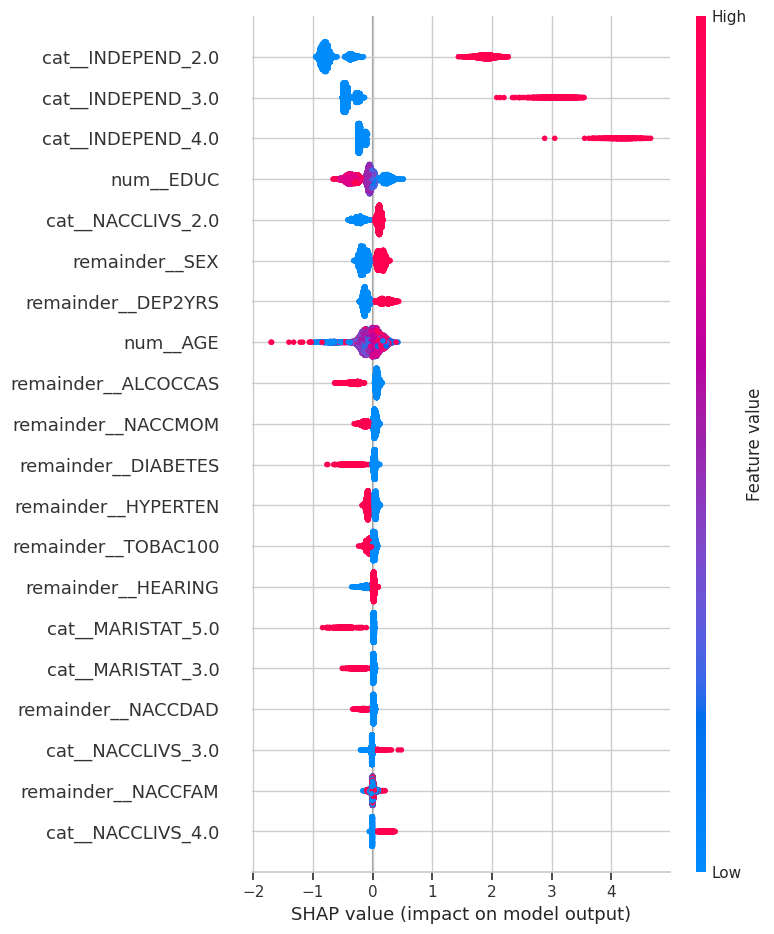

In [ ]:
from sklearn.ensemble import StackingClassifier

stack_fitted = stack_pipeline.named_steps['stack']

xgb_base = stack_fitted.estimators_[0]

explainer = shap.TreeExplainer(xgb_base)

shap_vals = explainer.shap_values(X_test_processed)

shap.summary_plot(shap_vals, X_test_processed, feature_names=preprocessor.get_feature_names_out())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


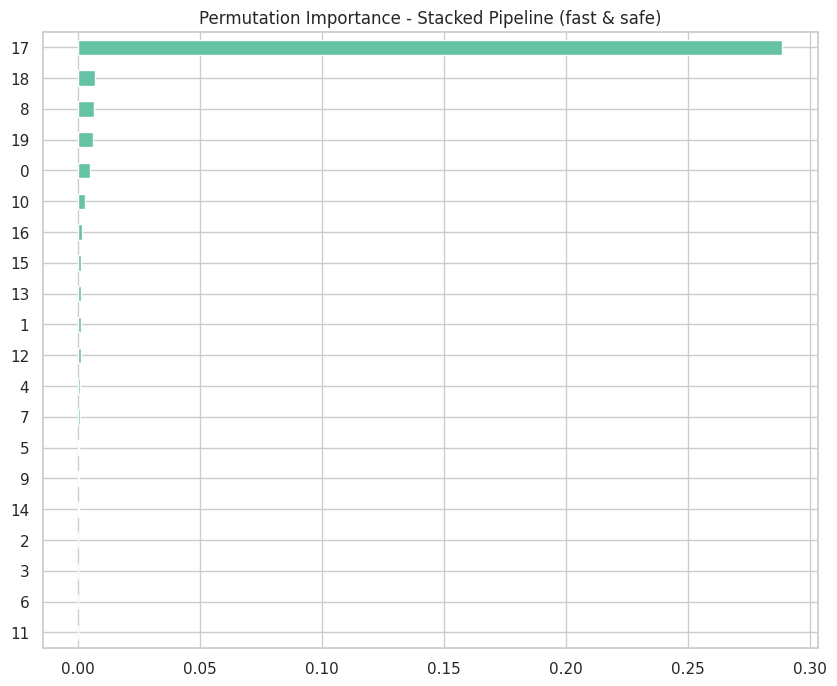

In [ ]:
perm = permutation_importance(
    stack_pipeline,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc',
    n_jobs=-1
)

# Simple plot
pd.Series(perm.importances_mean).sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Permutation Importance - Stacked Pipeline (fast & safe)")
plt.show()

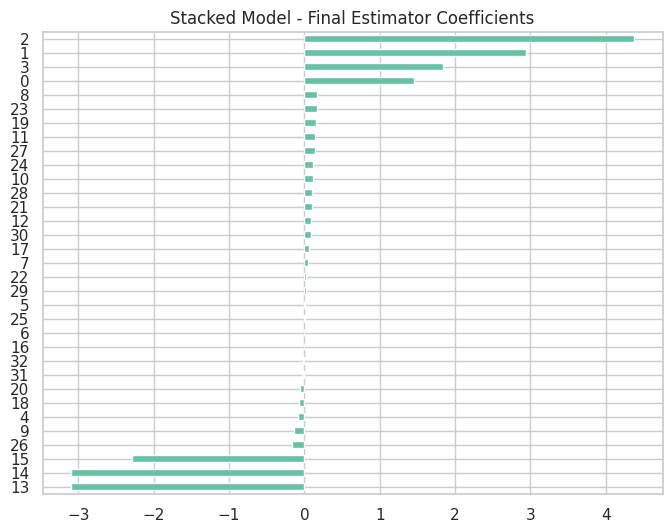

In [ ]:
final_est = stack_pipeline.named_steps['stack'].final_estimator_

coefs = final_est.coef_[0]

pd.Series(coefs).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Stacked Model - Final Estimator Coefficients")
plt.show()